In [1]:
import sys
sys.path.append('/home/c2032014/py_files/')
import numpy as np
import importlib
import load_and_clean as lac
import rms_norm_abs as rn
from stingray import Lightcurve, Powerspectrum, AveragedCrossspectrum
import dG_span_new_abs as dgs
importlib.reload(dgs)

import G_span_abs as gs
importlib.reload(gs)
importlib.reload(lac)
import frac_rms_span_abs as frmss
import phase_span as phs
import fit_rms_phase as frp
import F_test as ft

import frac_rms_err_span as fres
import phase_err_span as pes
import matplotlib.pyplot as plt
import chi_square as chis
import scipy
importlib.reload(frp)
importlib.reload(ft)
importlib.reload(dgs)

<module 'dG_span_new_abs' from '/home/c2032014/py_files/dG_span_new_abs.py'>

In [32]:
import os
import glob
def get_obs_file_pairs(obs_folder, obs_names):
    """
    Collects file1, file2, and gti paths for each observation.
    
    Args:
        obs_folder (str): Path to the folder containing observations.
        obs_names (list): List of observation directory names.
        file1_suffix (str): Filename suffix for file1.
        file2_suffix (str): Filename suffix for file2.
        gti_suffix (str): Filename suffix for GTI file.

    Returns:
        list of tuples: [(file1, file2, gti), ...]
    """
    obs_triplets = []
    for obs in obs_names:
        full_dir = os.path.join(obs_folder, obs)
        gti_path  = os.path.join(full_dir,  f"GTI_ixpe{obs}_evt2_v0*.txt")
        gti = glob.glob(gti_path)[0]
        full_dir = os.path.join(full_dir, "event_1pt5")
        file1_path = os.path.join(full_dir,  f"ixpe{obs}_det12*.fits")
        #print(file1_path)
        file1 = glob.glob(file1_path)[0]
        file2_path = os.path.join(full_dir, f"ixpe{obs}_det3*.fits")
        file2 = glob.glob(file2_path)[0]
        obs_triplets.append((file1, file2, gti))
    return obs_triplets


obs_dir='/home/c2032014/cygx1_paper/cyg_data_all'
obs_names=['01002901','01250101','03002201','03003101','03010001','03010101']
obs_triplets=get_obs_file_pairs(obs_dir, obs_names)

In [39]:
import numpy as np

# Your list of 6 arrays, each with 20 elements
data_arrays = [np.random.rand(20) for _ in range(6)]  # replace with your actual data
weights = np.array([1.0, 2.0, 1.5, 0.5, 1.0, 1.0])     # 6-element weights

# Convert list of arrays into a (6, 20) 2D array
data_array_2d = np.array(data_arrays)  # shape: (6, 20)

# Weighted average across the 6 observations (axis=0), result is (20,)
weighted_average = np.average(data_array_2d, axis=0, weights=weights)


In [3]:
def cross_spec_model_null(phi, C_nu_mag_sqrd):
    return (1/J) * C_nu_mag_sqrd * (1 + Q_norm * np.cos(2 * phi) + U_norm * np.sin(2 * phi))


('/home/c2032014/cygx1_paper/cyg_data_all/01002901/event_1pt5/ixpe01002901_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01002901/event_1pt5/ixpe01002901_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01002901/GTI_ixpe01002901_evt2_v01.txt')
num of events 9678551
num of events 4450960
cs ref mean 4.877659916653143
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264]]


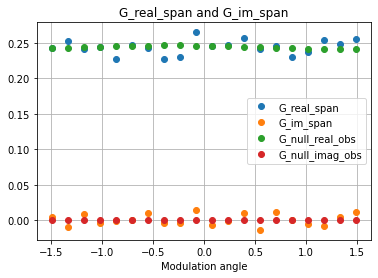

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/01250101/event_1pt5/ixpe01250101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01250101/event_1pt5/ixpe01250101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01250101/GTI_ixpe01250101_evt2_v01.txt')
num of events 3883959
num of events 1807055
cs ref mean 5.072306408937045
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448]]


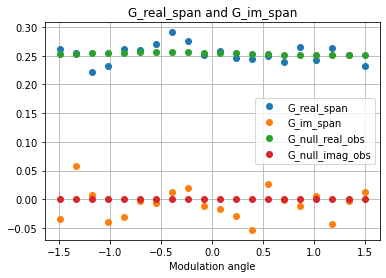

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03002201/event_1pt5/ixpe03002201_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03002201/event_1pt5/ixpe03002201_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03002201/GTI_ixpe03002201_evt2_v01.txt')
num of events 1777702
num of events 823553
cs ref mean 2.2054552428061034
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522]]


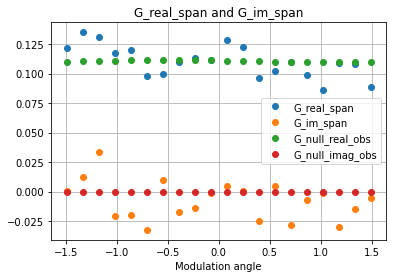

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03003101/GTI_ixpe03003101_evt2_v01.txt')
num of events 1701018
num of events 785926
cs ref mean 2.4350203660621634
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

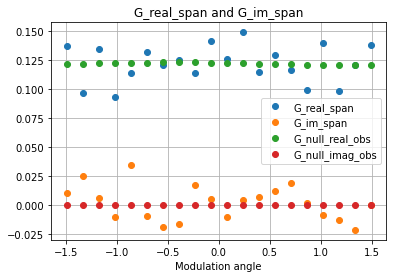

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03010001/event_1pt5/ixpe03010001_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010001/event_1pt5/ixpe03010001_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010001/GTI_ixpe03010001_evt2_v01.txt')
num of events 1813589
num of events 842912
cs ref mean 2.5454093654364853
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

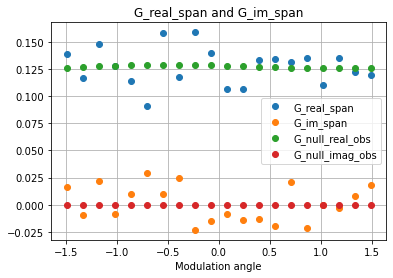

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03010101/event_1pt5/ixpe03010101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010101/event_1pt5/ixpe03010101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010101/GTI_ixpe03010101_evt2_v01.txt')
num of events 1365526
num of events 632960
cs ref mean 1.5168128971189763
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

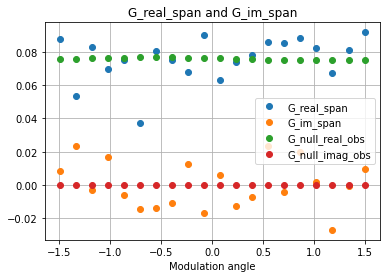

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')


In [4]:
norm='abs'
fmin=1
fmax=2

Pmin=51
Pmax=200

bin_length=1/64
seg_length=16


mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
J=mod_bin_number
spur_sub=True
coherence_corrector=False
output_file='/home/c2032014/cygx1_paper/qpo_finder_abs_stack_test.npy'

aspace = np.linspace(mod_min, mod_max, mod_bin_number + 1)
mod_min_array = aspace[:-1]
mod_max_array = aspace[1:]
av_mod = (mod_min_array + mod_max_array) / 2
av_mod_err = (mod_max_array - mod_min_array) / 2


# Real and Im parts of G
cs_G_obs=[]

# Real and Im parts of reference cross spec used in null hypothesis
cs_ref_obs=[]

G_real_span_arr=[]
G_im_span_arr=[]

G_real_null_arr=[]
G_im_null_arr=[]

dG_span_arr=[]

I_obs_arr=[]
Q_obs_arr=[]
U_obs_arr=[]
cs_ref_real_mean_arr=[]
cs_ref_im_mean_arr=[]
weights_ref=[]
weights_G_arr=[]
for obs in obs_triplets:
        
        

    print(obs)
    data1, *_ = lac.load_and_clean(obs[0], Pmin, Pmax)
    data2, *_ = lac.load_and_clean(obs[1], Pmin, Pmax)
    GTI = list(np.loadtxt(obs[2]))

    I_obs=len(data1['TIME'])
    Q_obs=data1['Q']
    U_obs=data1['U']

    I_obs_arr.append(I_obs)
    Q_obs_arr.append(Q_obs)
    U_obs_arr.append(U_obs)


    lc1 = Lightcurve.make_lightcurve(data1['TIME'], dt=bin_length, gti=GTI)
    lc2 = Lightcurve.make_lightcurve(data2['TIME'], dt=bin_length, gti=GTI)
    lc1.apply_gtis()
    lc2.apply_gtis()

    ps_2 = Powerspectrum.from_lightcurve(lc2, seg_length, norm='abs')
    ps_2_ref_mean=ps_2.power[(fmin<=ps_2.freq) & (ps_2.freq<=fmax)].mean()

    cs_ref = AveragedCrossspectrum.from_lightcurve(lc1, lc2, seg_length, norm='abs')
    cs_ref_obs.append(cs_ref)
    weights_ref.append(cs_ref.m)
    
    cs_ref_real_mean=cs_ref.power.real[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()
    cs_ref_real_mean_arr.append(cs_ref_real_mean)
    
    cs_ref_im_mean=cs_ref.power.imag[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()
    cs_ref_im_mean_arr.append(cs_ref_im_mean)



    cs_ref_mean=np.abs(cs_ref_real_mean+1j*cs_ref_im_mean)
    print('cs ref mean',cs_ref_real_mean)
    G_real_span, G_im_span, n_span, m_span,lc_1_sub_span,lc_spur,cs,*_ =gs.G_span(mod_bin_number,data1,lc2,GTI,bin_length,seg_length,fmin,fmax,spur_sub,norm)
    cs_G_obs.append(cs)
    weights_G_arr.append([cs.m for cs in cs])
    print('weihgts G',weights_G_arr)
    G_real_span_arr.append(G_real_span)
    G_im_span_arr.append(G_im_span)

    #I_tot=np.sum(I_obs_arr)
    #Q_norm=np.sum(Q_obs_arr)/ I_tot
    #U_norm=np.sum(U_obs_arr)/ I_tot  

    I_tot=I_obs
    Q_norm=np.sum(Q_obs)/I_tot
    U_norm=np.sum(U_obs)/I_tot


    G_null=cross_spec_model_null(np.array(av_mod),cs_ref_mean)
    G_null_real_obs=G_null.real
    G_real_null_arr.append(G_null_real_obs)
    G_null_imag_obs=G_null.imag
    G_im_null_arr.append(G_null_imag_obs)



    plt.figure()
    plt.plot(av_mod, G_real_span, 'o', label='G_real_span')
    plt.plot(av_mod, G_im_span, 'o', label='G_im_span')

    plt.plot(av_mod, G_null_real_obs, 'o', label='G_null_real_obs')
    plt.plot(av_mod, G_null_imag_obs, 'o', label='G_null_imag_obs')


    plt.xlabel('Modulation angle')
    plt.legend()
    plt.title('G_real_span and G_im_span')
    plt.grid()
    plt.show()
    
    dG_span= dgs.dG_span(G_real_span,G_im_span,lc_1_sub_span,n_span,
                m_span,fmin,fmax,seg_length,
                ps_2_ref_mean,cs_ref_real_mean,coherence_corrector)

    dG_span_arr.append(dG_span)



In [46]:
print(G_real_span_arr)
G_real=np.average(G_real_span_arr,weights=weights_G_arr,axis=0)

plt.figure()

for i in G_real_span_arr:
    plt.plot(av_mod, i, 'o')
plt.plot(av_mod, G_real, 'o', label='G_real')
plt.legend()


G_imag=np.average(G_im_span_arr,weights=weights_G_arr,axis=0)

plt.figure()
for i in G_im_span_arr:
    plt.plot(av_mod, i, 'o')
plt.plot(av_mod, G_imag, 'o', label='G_imag')
plt.legend()


G_null_real=np.average(G_real_null_arr,weights=weights_ref,axis=0)
plt.figure()
for i in G_real_null_arr:
    plt.plot(av_mod, i, 'o')
plt.plot(av_mod, G_null_real, 'o', label='G_null_real')
plt.legend()

G_null_imag=np.average(G_im_null_arr,weights=weights_ref,axis=0)
plt.figure()
for i in G_im_null_arr:
    plt.plot(av_mod, i, 'o')
plt.plot(av_mod, G_null_imag, 'o', label='G_null_imag')
plt.legend()

plt.figure()
plt.plot(av_mod, G_real, 'o', label='G_real')
plt.plot(av_mod, G_imag, 'o', label='G_imag')
plt.plot(av_mod, G_null_real, 'o', label='G_null_real')
plt.plot(av_mod, G_null_imag, 'o', label='G_null_imag')

#weight_dG=[i[0] for i in weights_G_arr]
#print(dG_span_arr)
#print(np.shape(dG_span))
dG= np.average(dG_span_arr,weights=weights_G_arr,axis=0)


[(0.24288132311027655, 0.25272296304108843, 0.2413322405153617, 0.24426625840366356, 0.22637338775344176, 0.24668801028351145, 0.2425245602775299, 0.22693000378890837, 0.230442356673338, 0.26477325016838243, 0.2457704281711905, 0.24641680739240687, 0.25623508030648945, 0.24098215860389208, 0.24579239694790117, 0.22964211528389106, 0.23668058762356897, 0.25385703640890184, 0.24853424335400767, 0.2548297532382711), (0.26247031553680467, 0.25443926526668664, 0.22131269948290563, 0.2322396326863198, 0.26181276910033413, 0.25918888078099656, 0.2698975036315666, 0.2909902373025636, 0.27581931245362395, 0.2506471392042499, 0.2585748011204997, 0.24623768150915293, 0.24491727588121284, 0.25022200044245957, 0.23845546521217256, 0.26475115305285973, 0.24256940501826119, 0.2642860322889384, 0.25171188467542344, 0.23176295432219546), (0.12166763105667414, 0.13501323961468467, 0.13095915240959818, 0.11759372467909572, 0.11956410409222401, 0.0977628986637354, 0.09959654356570989, 0.11000843078237879,

NameError: name 'plt' is not defined

In [45]:
dof_null_real=len(av_mod)
dof_null_imag=len(av_mod)
print('dof_null_real',dof_null_real)
print('dof_null_imag',dof_null_imag)


chi_real_null=chis.chi_square(np.array(G_real), np.array(G_null_real), np.array(dG))
chi_imag_null=chis.chi_square(np.array(G_imag), np.array(G_null_imag), np.array(dG))
print('chi_real_null',chi_real_null)
print('chi_imag_null',chi_imag_null)

parameters_sin180_real, fit_y_sin180_real, parameters_sin180_imag, fit_y_sin180_imag, dof_sin180_real, dof_sin180_imag, real_sin180_chi, imag_sin180_chi, reduced_chi_sin180 = frp.fit_sine_180(np.array(av_mod), np.array(G_real), np.array(dG), np.array(G_imag), np.array(dG))
print('chifit_sin180_real',real_sin180_chi)
print('chifit_sin180_imag',imag_sin180_chi)
print('dof_sin180_real',dof_sin180_real)
print('dof_sin180_imag',dof_sin180_imag)


plt.figure()
plt.plot(av_mod, G_real, 'o', label='G_real_span')
#plt.plot(av_mod, G_im_span, 'o', label='G_im_span')
plt.plot(av_mod, G_null_real, 'o', label='G_null_real')
#plt.plot(av_mod, G_null_imag, 'o', label='G_null_imag')
plt.plot(av_mod, fit_y_sin180_real, 'o', label='fit_y_sin180_real')
#plt.plot(av_mod, fit_y_sin180_imag, 'o', label='fit_y_sin180_imag')
plt.xlabel('Modulation angle')
plt.legend()






NameError: name 'av_mod' is not defined

In [44]:

# Degrees of freedom
df_null = dof_null_real + dof_null_imag
df_alt = dof_sin180_real + dof_sin180_imag
df1 = df_null - df_alt
df2 = df_alt

# Compute p-value from F-distribution
p_value = 1 - scipy.stats.f.cdf(F, df1, df2)
print('P-value:', p_value)

# Confidence and significance
confidence = 1 - p_value
significance = np.sqrt(2) * scipy.special.erfinv(confidence)
print('Confidence:', confidence)
print('Significance (σ):', significance)



NameError: name 'dof_null_real' is not defined

('/home/c2032014/cygx1_paper/cyg_data_all/01002901/event_1pt5/ixpe01002901_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01002901/event_1pt5/ixpe01002901_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01002901/GTI_ixpe01002901_evt2_v01.txt')
num of events 9678551
num of events 4450960
cs ref mean 4.877659916653143
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 3391, 3391, 3393], [3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630, 3630

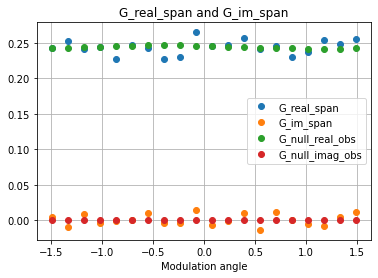

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/01250101/event_1pt5/ixpe01250101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01250101/event_1pt5/ixpe01250101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/01250101/GTI_ixpe01250101_evt2_v01.txt')
num of events 3883959
num of events 1807055
cs ref mean 5.072306408937045
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

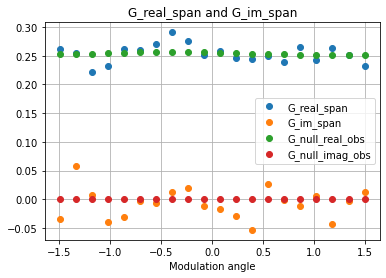

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03002201/event_1pt5/ixpe03002201_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03002201/event_1pt5/ixpe03002201_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03002201/GTI_ixpe03002201_evt2_v01.txt')
num of events 1777702
num of events 823553
cs ref mean 2.2054552428061034
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

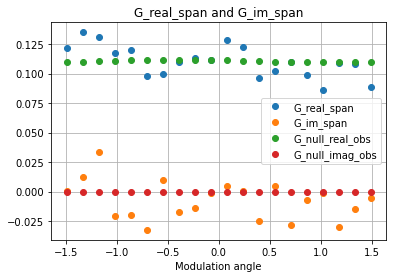

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03003101/event_1pt5/ixpe03003101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03003101/GTI_ixpe03003101_evt2_v01.txt')
num of events 1701018
num of events 785926
cs ref mean 2.4350203660621634
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

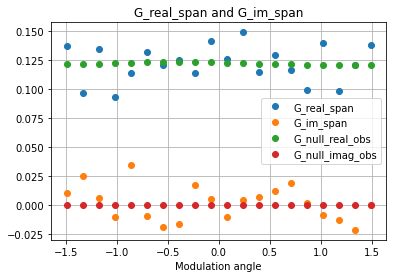

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03010001/event_1pt5/ixpe03010001_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010001/event_1pt5/ixpe03010001_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010001/GTI_ixpe03010001_evt2_v01.txt')
num of events 1813589
num of events 842912
cs ref mean 2.5454093654364853
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

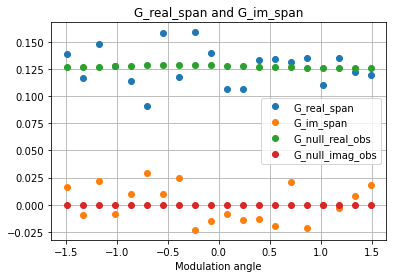

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
('/home/c2032014/cygx1_paper/cyg_data_all/03010101/event_1pt5/ixpe03010101_det12_event_1pt5_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010101/event_1pt5/ixpe03010101_det3_evt_1pt5_v01_src.fits', '/home/c2032014/cygx1_paper/cyg_data_all/03010101/GTI_ixpe03010101_evt2_v01.txt')
num of events 1365526
num of events 632960
cs ref mean 1.5168128971189763
weihgts G [[15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15264, 15263, 15264, 15264, 15264, 15264], [5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448, 5448], [3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522, 3522], [3395, 3393, 3393, 3394, 3393, 3390, 3391, 3394, 3390, 3393, 3395, 3394, 3392, 3392, 3393, 3394, 3393, 339

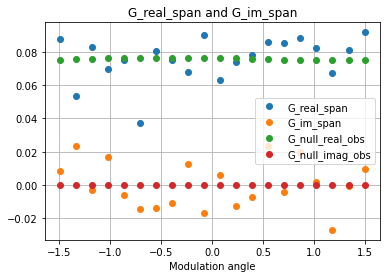

('lc_subject', 'G_real', 'G_im', 'n', 'm', 'fmin', 'fmax', 'seg_length', 'ps_2_mean', 'cs_ref_real_mean', 'coherence_corrector', 'dG')
Out obs triplet loop


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (12,) + inhomogeneous part.

In [50]:


#I_tot=np.sum(I_obs_arr)
#Q_norm=np.sum(Q_obs_arr)/ I_tot
#U_norm=np.sum(U_obs_arr)/ I_tot    
print('Out obs triplet loop')
I_tot=np.sum(I_obs_arr)
Q_norm=sum(sum(sublist) for sublist in Q_obs_arr)/I_tot
U_norm=sum(sum(sublist) for sublist in U_obs_arr)/I_tot

#weights_G=[[cs.m for cs in sublist] for sublist in cs_G_obs]




#weights_ref=[[cs.m for cs in sublist] for sublist in cs_ref_obs]
#print('weights_ref',weights_ref)

G_real=np.average(G_real_span_arr,weights=weights_G,axis=0)
G_im=np.average(G_im_span_arr,weights=weights_G,axis=0)




#cs_ref_real_mean=np.average(cs_ref_real_mean_arr,weights=weights_ref)
#cs_ref_im_mean=np.average(cs_ref_im_mean_arr,weights=weights_ref)

#print('cs ref real',cs_ref_real_mean)
#print('cs ref im',cs_ref_real_mean)

#print('average g real',G_real)
#print('average g im',G_im)

#G_real = np.average([[cs.power.real[(fmin <= cs.freq) & (cs.freq <= fmax)].mean() for cs in sublist] for sublist in cs_G_obs],weights=weights_G,axis=0)
#G_imag = np.average([[cs.power.imag[(fmin <= cs.freq) & (cs.freq <= fmax)].mean() for cs in sublist] for sublist in cs_G_obs],weights=weights_G,axis=0)
#print('cs g real',G_real)
#print('cs g im',G_imag)



#cs_ref_real_mean=np.average([[cs_ref.power.real[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in sublist] for sublist in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_im_mean=np.average([[cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in sublist] for sublist in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_imag_mean=np.average([cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_imag_mean=np.average([cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_average=cs_ref_real_mean+1j*cs_ref_im_mean
#cs_ref_abs_mean_stack=np.abs(cs_ref_average)

#G_null=cross_spec_model_null(np.array(av_mod),cs_ref_abs_mean_stack)
#G_null_real=G_null.real
#G_null_imag=G_null.imag

print('G real null arr', G_real_null_arr)
print('G im null arr', G_im_null_arr)

print('G REAL NULL SHAPE',np.shape(G_real_null_arr))
print('G IM NULL SHAPE',np.shape(G_im_null_arr))


#print(len(G_real_null_arr))
#print(len(weights_ref))



G_null_real=np.average(G_real_null_arr,weights=weights_G,axis=0)
G_null_im=np.average(G_im_null_arr,weights=weights_G,axis=0)

#180 deg fit

parameters_sin180_real, fit_y_sin180_real, parameters_sin180_imag, fit_y_sin180_imag, dof_sin180_real, dof_sin180_imag, real_sin180_chi, imag_sin180_chi, reduced_chi_sin180 = frp.fit_sine_180(np.array(av_mod), np.array(G_real_span), np.array(dG_span), np.array(G_im_span), np.array(dG_span))


"""
With the new null hypothesis, were not fitting the spectrum
anymore but rather calculating a null which we then compare. The question is then
how do i perform an F test between the null and the model when
the null is not a fit. 

An f-test needs the chi square and dof of each model. I guess in this case the number of
dof is just the number of data points because there are no free parameters. The chi square
is then just the data, its associated error and the calculated null.

"""

dof_null_real=len(av_mod)
dof_null_imag=len(av_mod)

chi_real_null=chis.chi_square(np.array(G_real_span), np.array(G_null_real), np.array(dG_span))
chi_imag_null=chis.chi_square(np.array(G_im_span), np.array(G_null_imag), np.array(dG_span))


#Ftest
F = ft.F_test(chi_real_null, chi_imag_null, dof_null_real, dof_null_imag, real_sin180_chi, imag_sin180_chi, dof_sin180_real, dof_sin180_imag)

p_value=1-scipy.stats.f.cdf(F,(dof_null_real+dof_null_imag),((dof_sin180_real+dof_sin180_imag)))
print(' P value',p_value)
confidence  = 1.0 - p_value
print('Confidence',confidence)
significance  = 2.0**0.5 * scipy.special.erfinv(confidence)
print('Significance:',significance)

plt.figure(figsize=(10, 6))
plt.plot(av_mod, G_real_span, 'o', label='G_real_span')
plt.plot(av_mod, G_im_span, 'o', label='G_im_span')
plt.plot(av_mod, G_null_real, 'o', label='G_null_real')
plt.plot(av_mod, G_null_imag, 'o', label='G_null_imag')
plt.plot(av_mod, fit_y_sin180_real, label='Fit G_real_span')
plt.plot(av_mod, fit_y_sin180_imag, label='Fit G_im_span')
plt.xlabel('Modulation angle')

plt.legend()
plt.title('G_real_span and G_im_span with Fit')
plt.grid()
plt.show()

"""
I havent stacked dG yet and also the null isnt coming out right for the real part
"""


In [ ]:

cs_G_obs=[]
cs_ref_obs=[]

G_real_span_arr=[]
G_im_span_arr=[]

G_real_null_arr=[]
G_im_null_arr=[]

I_obs_arr=[]
Q_obs_arr=[]
U_obs_arr=[]
cs_ref_real_mean_arr=[]
cs_ref_im_mean_arr=[]
weights_ref=[]
weights_G=[]
for obs in obs_triplets:
        
        

    print(obs)
    data1, *_ = lac.load_and_clean(obs[0], Pmin, Pmax)
    data2, *_ = lac.load_and_clean(obs[1], Pmin, Pmax)
    GTI = list(np.loadtxt(obs[2]))

    I_obs=len(data1['TIME'])
    Q_obs=data1['Q']
    U_obs=data1['U']

    I_obs_arr.append(I_obs)
    Q_obs_arr.append(Q_obs)
    U_obs_arr.append(U_obs)


    lc1 = Lightcurve.make_lightcurve(data1['TIME'], dt=bin_length, gti=GTI)
    lc2 = Lightcurve.make_lightcurve(data2['TIME'], dt=bin_length, gti=GTI)
    lc1.apply_gtis()
    lc2.apply_gtis()

    ps_2 = Powerspectrum.from_lightcurve(lc2, seg_length, norm='abs')
    ps_2_ref_mean=ps_2.power[(fmin<=ps_2.freq) & (ps_2.freq<=fmax)].mean()

    cs_ref = AveragedCrossspectrum.from_lightcurve(lc1, lc2, seg_length, norm='abs')
    cs_ref_obs.append(cs_ref)
    weights_ref.append(cs_ref.m)
    
    cs_ref_real_mean=cs_ref.power.real[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()
    cs_ref_real_mean_arr.append(cs_ref_real_mean)
    
    cs_ref_im_mean=cs_ref.power.imag[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()
    cs_ref_im_mean_arr.append(cs_ref_im_mean)



    cs_ref_mean=np.abs(cs_ref_real_mean+1j*cs_ref_im_mean)
    print('cs ref mean',cs_ref_real_mean)
    G_real_span, G_im_span, n_span, m_span,lc_1_sub_span,lc_spur,cs,*_ =gs.G_span(mod_bin_number,data1,lc2,GTI,bin_length,seg_length,fmin,fmax,spur_sub,norm)
    cs_G_obs.append(cs)
   
    weights_G.append([cs.m for cs in cs])
    print('weihgts G',weights_G)
    G_real_span_arr.append(G_real_span)
    G_im_span_arr.append(G_im_span)


    G_null=cross_spec_model_null(np.array(av_mod),cs_ref_mean)
    G_null_real_obs=G_null.real
    G_real_null_arr.append(G_null_real_obs)
    G_null_imag_obs=G_null.imag
    G_im_null_arr.append(G_null_imag_obs)



    plt.figure()
    plt.plot(av_mod, G_real_span, 'o', label='G_real_span')
    plt.plot(av_mod, G_im_span, 'o', label='G_im_span')

    plt.plot(av_mod, G_null_real_obs, 'o', label='G_null_real_obs')
    plt.plot(av_mod, G_null_imag_obs, 'o', label='G_null_imag_obs')


    plt.xlabel('Modulation angle')
    plt.legend()
    plt.title('G_real_span and G_im_span')
    plt.grid()
    plt.show()
    
    dG_span= dgs.dG_span(G_real_span,G_im_span,lc_1_sub_span,n_span,
                m_span,fmin,fmax,seg_length,
                ps_2_ref_mean,cs_ref_real_mean,coherence_corrector)





#I_tot=np.sum(I_obs_arr)
#Q_norm=np.sum(Q_obs_arr)/ I_tot
#U_norm=np.sum(U_obs_arr)/ I_tot    
print('Out obs triplet loop')
I_tot=np.sum(I_obs_arr)
Q_norm=sum(sum(sublist) for sublist in Q_obs_arr)/I_tot
U_norm=sum(sum(sublist) for sublist in U_obs_arr)/I_tot

#weights_G=[[cs.m for cs in sublist] for sublist in cs_G_obs]




#weights_ref=[[cs.m for cs in sublist] for sublist in cs_ref_obs]
#print('weights_ref',weights_ref)

G_real=np.average(G_real_span_arr,weights=weights_G,axis=0)
G_im=np.average(G_im_span_arr,weights=weights_G,axis=0)




#cs_ref_real_mean=np.average(cs_ref_real_mean_arr,weights=weights_ref)
#cs_ref_im_mean=np.average(cs_ref_im_mean_arr,weights=weights_ref)

#print('cs ref real',cs_ref_real_mean)
#print('cs ref im',cs_ref_real_mean)

#print('average g real',G_real)
#print('average g im',G_im)

#G_real = np.average([[cs.power.real[(fmin <= cs.freq) & (cs.freq <= fmax)].mean() for cs in sublist] for sublist in cs_G_obs],weights=weights_G,axis=0)
#G_imag = np.average([[cs.power.imag[(fmin <= cs.freq) & (cs.freq <= fmax)].mean() for cs in sublist] for sublist in cs_G_obs],weights=weights_G,axis=0)
#print('cs g real',G_real)
#print('cs g im',G_imag)

import chi_square as chis

#cs_ref_real_mean=np.average([[cs_ref.power.real[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in sublist] for sublist in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_im_mean=np.average([[cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in sublist] for sublist in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_imag_mean=np.average([cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_imag_mean=np.average([cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_average=cs_ref_real_mean+1j*cs_ref_im_mean
#cs_ref_abs_mean_stack=np.abs(cs_ref_average)

#G_null=cross_spec_model_null(np.array(av_mod),cs_ref_abs_mean_stack)
#G_null_real=G_null.real
#G_null_imag=G_null.imag

print('G real null arr', G_real_null_arr)
print('G im null arr', G_im_null_arr)

print('G REAL NULL SHAPE',np.shape(G_real_null_arr))
print('G IM NULL SHAPE',np.shape(G_im_null_arr))


#print(len(G_real_null_arr))
#print(len(weights_ref))



G_null_real=np.average(G_real_null_arr,weights=weights_G,axis=0)
G_null_im=np.average(G_im_null_arr,weights=weights_G,axis=0)

#180 deg fit

parameters_sin180_real, fit_y_sin180_real, parameters_sin180_imag, fit_y_sin180_imag, dof_sin180_real, dof_sin180_imag, real_sin180_chi, imag_sin180_chi, reduced_chi_sin180 = frp.fit_sine_180(np.array(av_mod), np.array(G_real_span), np.array(dG_span), np.array(G_im_span), np.array(dG_span))


"""
With the new null hypothesis, were not fitting the spectrum
anymore but rather calculating a null which we then compare. The question is then
how do i perform an F test between the null and the model when
the null is not a fit. 

An f-test needs the chi square and dof of each model. I guess in this case the number of
dof is just the number of data points because there are no free parameters. The chi square
is then just the data, its associated error and the calculated null.

"""

dof_null_real=len(av_mod)
dof_null_imag=len(av_mod)

chi_real_null=chis.chi_square(np.array(G_real_span), np.array(G_null_real), np.array(dG_span))
chi_imag_null=chis.chi_square(np.array(G_im_span), np.array(G_null_imag), np.array(dG_span))


#Ftest
F = ft.F_test(chi_real_null, chi_imag_null, dof_null_real, dof_null_imag, real_sin180_chi, imag_sin180_chi, dof_sin180_real, dof_sin180_imag)

p_value=1-scipy.stats.f.cdf(F,(dof_null_real+dof_null_imag),((dof_sin180_real+dof_sin180_imag)))
print(' P value',p_value)
confidence  = 1.0 - p_value
print('Confidence',confidence)
significance  = 2.0**0.5 * scipy.special.erfinv(confidence)
print('Significance:',significance)

plt.figure(figsize=(10, 6))
plt.plot(av_mod, G_real_span, 'o', label='G_real_span')
plt.plot(av_mod, G_im_span, 'o', label='G_im_span')
plt.plot(av_mod, G_null_real, 'o', label='G_null_real')
plt.plot(av_mod, G_null_imag, 'o', label='G_null_imag')
plt.plot(av_mod, fit_y_sin180_real, label='Fit G_real_span')
plt.plot(av_mod, fit_y_sin180_imag, label='Fit G_im_span')
plt.xlabel('Modulation angle')

plt.legend()
plt.title('G_real_span and G_im_span with Fit')
plt.grid()
plt.show()

"""
I havent stacked dG yet and also the null isnt coming out right for the real part
"""


In [ ]:

cs_G_obs=[]
cs_ref_obs=[]

G_real_span_arr=[]
G_im_span_arr=[]

G_real_null_arr=[]
G_im_null_arr=[]

I_obs_arr=[]
Q_obs_arr=[]
U_obs_arr=[]
cs_ref_real_mean_arr=[]
cs_ref_im_mean_arr=[]
weights_ref=[]
weights_G=[]
for obs in obs_triplets:
        
        

    print(obs)
    data1, *_ = lac.load_and_clean(obs[0], Pmin, Pmax)
    data2, *_ = lac.load_and_clean(obs[1], Pmin, Pmax)
    GTI = list(np.loadtxt(obs[2]))

    I_obs=len(data1['TIME'])
    Q_obs=data1['Q']
    U_obs=data1['U']

    I_obs_arr.append(I_obs)
    Q_obs_arr.append(Q_obs)
    U_obs_arr.append(U_obs)


    lc1 = Lightcurve.make_lightcurve(data1['TIME'], dt=bin_length, gti=GTI)
    lc2 = Lightcurve.make_lightcurve(data2['TIME'], dt=bin_length, gti=GTI)
    lc1.apply_gtis()
    lc2.apply_gtis()

    ps_2 = Powerspectrum.from_lightcurve(lc2, seg_length, norm='abs')
    ps_2_ref_mean=ps_2.power[(fmin<=ps_2.freq) & (ps_2.freq<=fmax)].mean()

    cs_ref = AveragedCrossspectrum.from_lightcurve(lc1, lc2, seg_length, norm='abs')
    cs_ref_obs.append(cs_ref)
    weights_ref.append(cs_ref.m)
    
    cs_ref_real_mean=cs_ref.power.real[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()
    cs_ref_real_mean_arr.append(cs_ref_real_mean)
    
    cs_ref_im_mean=cs_ref.power.imag[(fmin<=cs_ref.freq) & (cs_ref.freq<=fmax)].mean()
    cs_ref_im_mean_arr.append(cs_ref_im_mean)



    cs_ref_mean=np.abs(cs_ref_real_mean+1j*cs_ref_im_mean)
    print('cs ref mean',cs_ref_real_mean)
    G_real_span, G_im_span, n_span, m_span,lc_1_sub_span,lc_spur,cs,*_ =gs.G_span(mod_bin_number,data1,lc2,GTI,bin_length,seg_length,fmin,fmax,spur_sub,norm)
    cs_G_obs.append(cs)
   
    weights_G.append([cs.m for cs in cs])
    print('weihgts G',weights_G)
    G_real_span_arr.append(G_real_span)
    G_im_span_arr.append(G_im_span)


    G_null=cross_spec_model_null(np.array(av_mod),cs_ref_mean)
    G_null_real_obs=G_null.real
    G_real_null_arr.append(G_null_real_obs)
    G_null_imag_obs=G_null.imag
    G_im_null_arr.append(G_null_imag_obs)



    plt.figure()
    plt.plot(av_mod, G_real_span, 'o', label='G_real_span')
    plt.plot(av_mod, G_im_span, 'o', label='G_im_span')

    plt.plot(av_mod, G_null_real_obs, 'o', label='G_null_real_obs')
    plt.plot(av_mod, G_null_imag_obs, 'o', label='G_null_imag_obs')


    plt.xlabel('Modulation angle')
    plt.legend()
    plt.title('G_real_span and G_im_span')
    plt.grid()
    plt.show()
    
    dG_span= dgs.dG_span(G_real_span,G_im_span,lc_1_sub_span,n_span,
                m_span,fmin,fmax,seg_length,
                ps_2_ref_mean,cs_ref_real_mean,coherence_corrector)





#I_tot=np.sum(I_obs_arr)
#Q_norm=np.sum(Q_obs_arr)/ I_tot
#U_norm=np.sum(U_obs_arr)/ I_tot    
print('Out obs triplet loop')
I_tot=np.sum(I_obs_arr)
Q_norm=sum(sum(sublist) for sublist in Q_obs_arr)/I_tot
U_norm=sum(sum(sublist) for sublist in U_obs_arr)/I_tot

#weights_G=[[cs.m for cs in sublist] for sublist in cs_G_obs]




#weights_ref=[[cs.m for cs in sublist] for sublist in cs_ref_obs]
#print('weights_ref',weights_ref)

G_real=np.average(G_real_span_arr,weights=weights_G,axis=0)
G_im=np.average(G_im_span_arr,weights=weights_G,axis=0)




#cs_ref_real_mean=np.average(cs_ref_real_mean_arr,weights=weights_ref)
#cs_ref_im_mean=np.average(cs_ref_im_mean_arr,weights=weights_ref)

#print('cs ref real',cs_ref_real_mean)
#print('cs ref im',cs_ref_real_mean)

#print('average g real',G_real)
#print('average g im',G_im)

#G_real = np.average([[cs.power.real[(fmin <= cs.freq) & (cs.freq <= fmax)].mean() for cs in sublist] for sublist in cs_G_obs],weights=weights_G,axis=0)
#G_imag = np.average([[cs.power.imag[(fmin <= cs.freq) & (cs.freq <= fmax)].mean() for cs in sublist] for sublist in cs_G_obs],weights=weights_G,axis=0)
#print('cs g real',G_real)
#print('cs g im',G_imag)



#cs_ref_real_mean=np.average([[cs_ref.power.real[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in sublist] for sublist in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_im_mean=np.average([[cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in sublist] for sublist in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_imag_mean=np.average([cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_imag_mean=np.average([cs_ref.power.imag[(fmin <= cs_ref.freq) & (cs_ref.freq <= fmax)].mean() for cs_ref in cs_ref_obs],weights=weights_ref,axis=0)
#cs_ref_average=cs_ref_real_mean+1j*cs_ref_im_mean
#cs_ref_abs_mean_stack=np.abs(cs_ref_average)

#G_null=cross_spec_model_null(np.array(av_mod),cs_ref_abs_mean_stack)
#G_null_real=G_null.real
#G_null_imag=G_null.imag

print('G real null arr', G_real_null_arr)
print('G im null arr', G_im_null_arr)

print('G REAL NULL SHAPE',np.shape(G_real_null_arr))
print('G IM NULL SHAPE',np.shape(G_im_null_arr))


#print(len(G_real_null_arr))
#print(len(weights_ref))



G_null_real=np.average(G_real_null_arr,weights=weights_G,axis=0)
G_null_im=np.average(G_im_null_arr,weights=weights_G,axis=0)

#180 deg fit

parameters_sin180_real, fit_y_sin180_real, parameters_sin180_imag, fit_y_sin180_imag, dof_sin180_real, dof_sin180_imag, real_sin180_chi, imag_sin180_chi, reduced_chi_sin180 = frp.fit_sine_180(np.array(av_mod), np.array(G_real_span), np.array(dG_span), np.array(G_im_span), np.array(dG_span))


"""
With the new null hypothesis, were not fitting the spectrum
anymore but rather calculating a null which we then compare. The question is then
how do i perform an F test between the null and the model when
the null is not a fit. 

An f-test needs the chi square and dof of each model. I guess in this case the number of
dof is just the number of data points because there are no free parameters. The chi square
is then just the data, its associated error and the calculated null.

"""

dof_null_real=len(av_mod)
dof_null_imag=len(av_mod)

chi_real_null=chis.chi_square(np.array(G_real_span), np.array(G_null_real), np.array(dG_span))
chi_imag_null=chis.chi_square(np.array(G_im_span), np.array(G_null_imag), np.array(dG_span))


#Ftest
F = ft.F_test(chi_real_null, chi_imag_null, dof_null_real, dof_null_imag, real_sin180_chi, imag_sin180_chi, dof_sin180_real, dof_sin180_imag)

p_value=1-scipy.stats.f.cdf(F,(dof_null_real+dof_null_imag),((dof_sin180_real+dof_sin180_imag)))
print(' P value',p_value)
confidence  = 1.0 - p_value
print('Confidence',confidence)
significance  = 2.0**0.5 * scipy.special.erfinv(confidence)
print('Significance:',significance)

plt.figure(figsize=(10, 6))
plt.plot(av_mod, G_real_span, 'o', label='G_real_span')
plt.plot(av_mod, G_im_span, 'o', label='G_im_span')
plt.plot(av_mod, G_null_real, 'o', label='G_null_real')
plt.plot(av_mod, G_null_imag, 'o', label='G_null_imag')
plt.plot(av_mod, fit_y_sin180_real, label='Fit G_real_span')
plt.plot(av_mod, fit_y_sin180_imag, label='Fit G_im_span')
plt.xlabel('Modulation angle')

plt.legend()
plt.title('G_real_span and G_im_span with Fit')
plt.grid()
plt.show()

"""
I havent stacked dG yet and also the null isnt coming out right for the real part
"""


In [17]:
import numpy as np

norm='abs'
fmin=1
fmax=2

Pmin=51
Pmax=200

bin_length=1/64
seg_length=16


mod_min=np.radians(-90)
mod_max=np.radians(90)
mod_bin_number=20
J=mod_bin_number
spur_sub=True
coherence_corrector=False
output_file='/home/c2032014/cygx1_paper/qpo_finder_abs_stack_test.npy'

In [29]:
import sys
sys.path.append('/home/c2032014/cygx1_paper/')
from joblib import Parallel, delayed
import QPO_finder_abs_stack as qpo
import importlib
importlib.reload(qpo)



results = Parallel(n_jobs=-1)(delayed(qpo.process_obs)(
    obs, Pmin, Pmax, bin_length, seg_length, fmin, fmax,
    spur_sub, norm, mod_bin_number, coherence_corrector, plot=False
) for obs in obs_triplets)

I_obs_arr = []
Q_obs_arr = []
U_obs_arr = []
cs_ref_obs = []
weights_ref = []
cs_ref_real_mean_arr = []
cs_ref_im_mean_arr = []
cs_G_obs = []
weights_G_arr = []
G_real_span_arr = []
G_im_span_arr = []
G_real_null_arr = []
G_im_null_arr = []
dG_span_arr = []

# Unpack resultsdof_null_real=len(av_mod)
dof_null_imag=len(av_mod)

chi_real_null=chis.chi_square(np.array(G_real_span), np.array(G_null_real), np.array(dG_span))
chi_imag_null=chis.chi_square(np.array(G_im_span), np.array(G_null_imag), np.array(dG_span))

    I_obs_arr.append(res['I_obs'])
    Q_obs_arr.append(res['Q_obs'])
    U_obs_arr.append(res['U_obs'])
    cs_ref_obs.append(res['cs_ref'])
    weights_ref.append(res['weights_ref'])
    cs_ref_real_mean_arr.append(res['cs_ref_mean_real'])
    cs_ref_im_mean_arr.append(res['cs_ref_mean_imag'])
    cs_G_obs.append(res['cs_list'])
    weights_G_arr.append(res['weights_G'])
    G_real_span_arr.append(res['G_real_span'])
    G_im_span_arr.append(res['G_im_span'])
    G_real_null_arr.append(res['G_null_real'])
    G_im_null_arr.append(res['G_null_imag'])
    dG_span_arr.append(res['dG_span'])


IndentationError: unexpected indent (4144627129.py, line 36)

In [ ]:
# Degrees of freedom
df_null = dof_null_real + dof_null_imag
df_alt = dof_sin180_real + dof_sin180_imag
df1 = df_null - df_alt
df2 = df_alt

# Compute p-value from F-distribution
p_value = 1 - scipy.stats.f.cdf(F, df1, df2)
print('P-value:', p_value)

# Confidence and significance
confidence = 1 - p_value
significance = np.sqrt(2) * scipy.special.erfinv(confidence)
print('Confidence:', confidence)
print('Significance (σ):', significance)


num of events 9678551
num of events 1365526
num of events 1813589
num of events 1701018
num of events 1777702
num of events 3883959
num of events 632960
num of events 842912
num of events 785926
num of events 823553
num of events 1807055
num of events 4450960
F 1.1053826256501722
 P value 0.38504886756038215
Confidence 0.6149511324396179
Significance: 0.8686312291413533
Confidence: 0.4721833937750973
Significance (σ): 0.6313424962770182
F 0.21057373212227698
 P value 0.9999976468104332
Confidence 2.353189566761671e-06
Significance: 2.949285751810015e-06
Confidence: 1.1102230246251565e-16
Significance (σ): 1.3914582123358836e-16
F 1.1852770920894573
 P value 0.3080585429567344
Confidence 0.6919414570432656
Significance: 1.0193042583961172
Confidence: 0.5705170904061896
Significance (σ): 0.7900768142362419
F 0.9059714489139562
 P value 0.6204282649089026
Confidence 0.37957173509109743
Significance: 0.49524347608204194
Confidence: 0.19266223046477526
Significance (σ): 0.2438619107295293
F

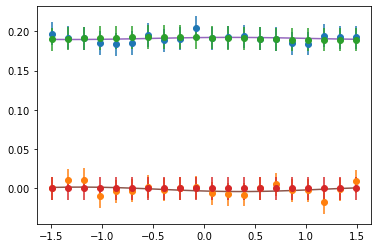

In [60]:
importlib.reload(qpo)

qpo.run_QPO_finder_absolute_stacked(obs_dir,obs_names,Pmin,Pmax,bin_length,seg_length,fmin,fmax,mod_bin_number,spur_sub,coherence_corrector,output_file)


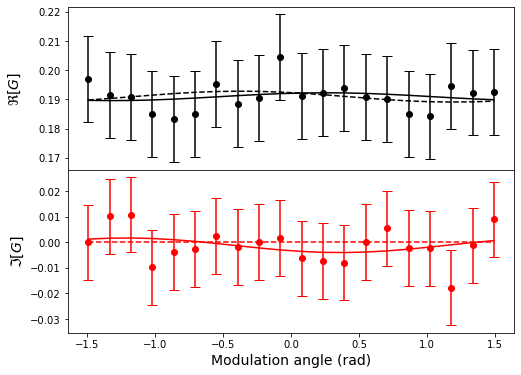

In [93]:
result=np.transpose(np.loadtxt(output_file))
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'hspace': 0})
ax1.errorbar(result[0], result[1], yerr=result[5], fmt='o', label='G_real',color='black',capsize=5)
ax1.plot(result[0], result[3],label='G_null_real',ls='--',color='black')
ax1.plot(result[0], result[6], label='G_fit_real',color='black')
ax1.set_ylabel(r'$\Re [G]$', fontsize=14,labelpad=15)
ax2.errorbar(result[0], result[2], yerr=result[5], fmt='o', label='G_imag',color='red',capsize=5)
ax2.plot(result[0], result[4],  label='G_null_imag',ls='--',color='red')
ax2.plot(result[0], result[7], label='G_fit_imag',color='red')
ax2.set_xlabel('Modulation angle (rad)', fontsize=14)
ax2.set_ylabel(r'$\Im [G]$', fontsize=14)
plt.savefig('G_real_imag.pdf', dpi=10000)